# Large set

## Load data

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import functions as fc

df = pd.read_csv("/ceph/aavocone/Datasets/3_small_set.csv")

/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


FileNotFoundError: [Errno 2] No such file or directory: '/work/aavocone/small_set.csv'

## train test val split

In [ ]:
from sklearn.model_selection import train_test_split

#test train split
X = df[df.columns[:-3]]    #exclude "signal" "classification" "B_sig_isSignalAcceptMissingNeutrino"
y = df["signal"]            
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5, stratify= ytrain)


## load models and predict_proba

In [ ]:
model50 = xgb.XGBClassifier()
model50.load_model("/work/aavocone/models/model50.txt")
y50_train = model50.predict_proba(xtrain)[:,1]
y50 = model50.predict_proba(xtest)[:,1]

model100 = xgb.XGBClassifier()
model100.load_model("/work/aavocone/models/model100.txt")
y100_train = model100.predict_proba(xtrain)[:,1]
y100 = model100.predict_proba(xtest)[:,1]

model200 = xgb.XGBClassifier()
model200.load_model("/work/aavocone/models/model200.txt")
y200_train = model200.predict_proba(xtrain)[:,1]
y200 = model200.predict_proba(xtest)[:,1]

model500 = xgb.XGBClassifier()
model500.load_model("/work/aavocone/models/model500.txt")
y500_train = model500.predict_proba(xtrain)[:,1]
y500 = model500.predict_proba(xtest)[:,1]




## estimator = 50, get efficiency

In [ ]:
print("train:")
sh50_train,bh50_train,s50_train,b50_train,bin_edges = fc.efficiency(y50_train,ytrain)
print("test:")
sh50,bh50,s50,b50,bin_edges = fc.efficiency(y50,ytest)

print(sum(sh50))
print(sum(sh50_train))
print(sum(ytest))


train:
test:
556.9772210866213
564.2649637013674
664.0


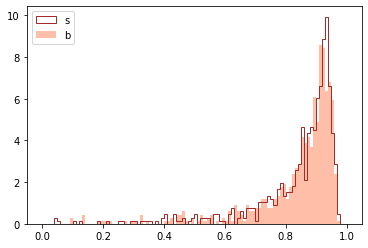

In [ ]:
plt.hist(sh50, density=True,bins=bin_edges, histtype="step",label="s", color="brown")
plt.hist(sh50_train, density=True, bins=bin_edges, histtype="stepfilled", alpha=0.5, color ="coral",label="b")


plt.legend(loc=2)
plt.show()

## 50 overtraining

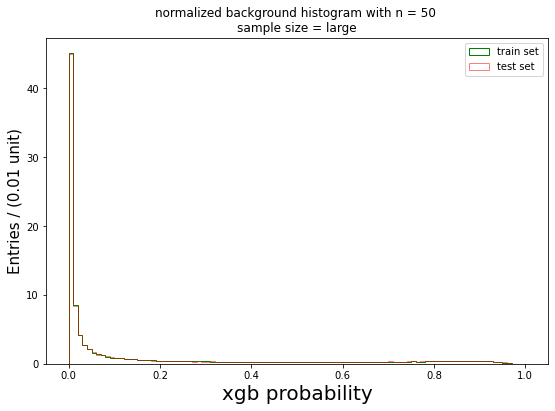

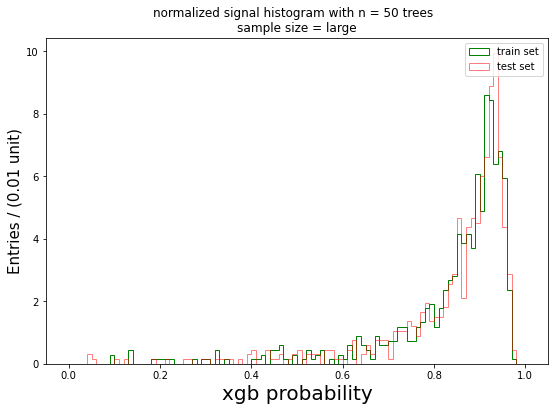

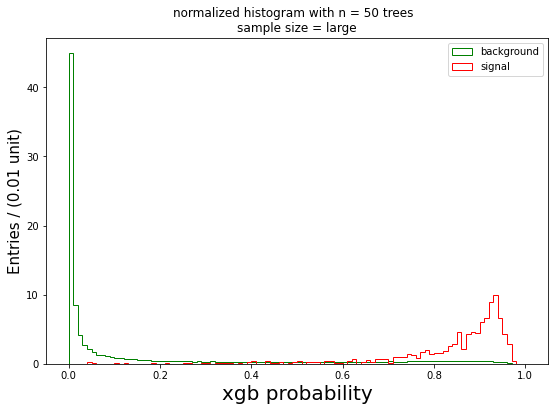

In [ ]:
estimator = 50
#Test for overtraining
#background
plt.figure(figsize=(9,6))
plt.hist(bh50_train,bins = bin_edges, density=True, histtype="step", label = "train set", color = "g")
plt.hist(bh50,bins = bin_edges, density=True, histtype="step", label = "test set", color = "r", alpha = 0.5)
plt.title(f"normalized background histogram with n = {estimator} \nsample size = large")
plt.ylabel("Entries / ({:.2f} unit)".format(bin_edges[1]-bin_edges[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
plt.show() 

#signal
plt.figure(figsize=(9,6))
plt.hist(sh50_train,bins = bin_edges, density=True, histtype="step", label = "train set", color = "g")
plt.hist(sh50,bins = bin_edges, density=True, histtype="step", label = "test set", color = "r", alpha = 0.5)
plt.title(f"normalized signal histogram with n = {estimator} trees  \nsample size = large")
plt.ylabel("Entries / ({:.2f} unit)".format(bin_edges[1]-bin_edges[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
plt.show()


#histogram
plt.figure(figsize=(9,6))
plt.hist(bh50,bins = bin_edges, density=True, histtype="step", label = "background", color = "g")
plt.hist(sh50,bins = bin_edges, density=True, histtype="step", label = "signal", color = "r")
plt.title(f"normalized histogram with n = {estimator} trees  \nsample size = large")
plt.ylabel("Entries / ({:.2f} unit)".format(bin_edges[1]-bin_edges[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
plt.show()


